In [1]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier 

/Library/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Library/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.cross_validation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
#because dataset is skewed we can try out logistic regression with balanced weights
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [3]:
%pylab inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import RandomizedSearchCV 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    # available from https://s3.amazonaws.com/datarobotblog/notebooks/sklearn_backports.py
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline

# ignore DeprecateWarnings by sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


/Library/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
# Import SciKit Learn functions
from sklearn.metrics import roc_curve, auc , roc_auc_score, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import grid_search
from sklearn import tree

In [5]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_train.SeriousDlqin2yrs))
    plt.xticks(tick_marks, df_train.SeriousDlqin2yrs, rotation=45)
    plt.yticks(tick_marks, df_train.SeriousDlqin2yrs)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
df_train=pd.read_csv('train_ireg_amd_dmd.csv')
df_test=pd.read_csv('test_ireg_amd_dmd.csv')

In [7]:
df_train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
5,5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
6,6,0,0.305682,57,0,5710.000000,8738.957438,8,0,3,0,0.0
7,7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0
8,8,0,0.116951,27,0,46.000000,3045.627787,2,0,0,0,1.0
9,9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0


In [8]:
#Currently getting subset of data and just wrangling around and trying

Y_train=np.array(df_train.SeriousDlqin2yrs)
#features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
#            'MonthlyIncome', 'age', 'NumberOfTimes90DaysLate']
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_train=np.array(df_train[features])

In [9]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25)

In [12]:
param = {'objective':'binary:logistic','booster':'gbtree','eta':0.01, # 0.06, #0.01,0.005
        'max_depth':20, #changed from default of 4,6,8,10,15,20
        'subsample':0.5, #(.5,0.7,1)
        'colsample_bytree':0.5, #(.5,0.7,1)
        'min_child_weight':44.8833}

param['nthread'] = 4
param['eval_metric'] = 'auc'

In [11]:
train_all=xgb.DMatrix(X_train,Y_train)

In [27]:
xgb.cv(param,train_all, num_boost_round=2000,nfold=3)

KeyboardInterrupt: 

In [12]:
clf_best=xgb.train(param,train_all,num_boost_round=420,maximize=False)


In [13]:
validate_all=xgb.DMatrix(X_validation)
pred=clf_best.predict(validate_all)
auc_score=roc_auc_score(Y_validation,pred)
print "ROC score on model with depth  ",roc_auc_score(Y_validation,pred)

ROC score on model with depth   0.864129460585


In [12]:
#2nd
clf_best=xgb.train(param,train_all,num_boost_round=500,maximize=False)

In [13]:
validate_all=xgb.DMatrix(X_validation)
pred=clf_best.predict(validate_all)
auc_score=roc_auc_score(Y_validation,pred)
print "ROC score on model with depth  ",roc_auc_score(Y_validation,pred)

ROC score on model with depth   0.865086101605


In [14]:
# lets use best model to learn whole model
X_train_final=np.array(df_train[features])
Y_train_final=np.array(df_train.SeriousDlqin2yrs)

train_all=xgb.DMatrix(X_train_final,Y_train_final)
clf_best=xgb.train(param,train_all,num_boost_round=500,maximize=False)

In [15]:
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_test=np.array(df_test[features])
test_all=xgb.DMatrix(X_test)
pred_test=clf_best.predict(test_all)

In [16]:
del df_test['Unnamed: 0']
df_test[features].head()
df_test['prob']=pred_test

In [19]:
idx=np.arange(1,len(pred_test)+1,1)
print len(pred_test)

#output=np.array()
#output=np.zeros((len(pred_test),2))
#output[:,0]=idx
#output[:,1]=pred_test
output=pd.DataFrame(pred_test)
dfoutput=pd.DataFrame(output)
dfoutput['Id']=idx
dfoutput['Probability']=dfoutput[0]
del dfoutput[0]
#dfoutput

101503


In [ ]:
#to write

# Best Model

In [13]:
train_all=xgb.DMatrix(X_train,Y_train)

In [14]:
#3rd approach worked best 650 boost round
clf_best=xgb.train(param,train_all,num_boost_round=690,maximize=False)

In [28]:
#not for stacking
validate_all=xgb.DMatrix(X_validation)
pred=clf_best.predict(validate_all)
auc_score=roc_auc_score(Y_validation,pred)
print "ROC score on model with depth  ",roc_auc_score(Y_validation,pred)

ROC score on model with depth   0.879436328459


In [25]:

clf_best.save_model('0001.model')
# dump model
clf_best.dump_model('dump.raw.txt')
# dump model with feature map
clf_best.dump_model('dump.nice.txt')

# save dmatrix into binary buffer
X_test=np.array(df_test[features])
test_all=xgb.DMatrix(X_test)
test_all.save_binary('dtest.buffer')
# save model
clf_best.save_model('xgb.model')
# load model and data in
bst2 = xgb.Booster(model_file='xgb.model')
dtest2 = xgb.DMatrix('dtest.buffer')
preds2 = bst2.predict(dtest2)

In [26]:
preds2

array([ 0.06008984,  0.04940964,  0.01943868, ...,  0.00577872,
        0.07268213,  0.04309626], dtype=float32)

In [29]:
# lets use best model to learn whole model
#not for stacking
X_train_final=np.array(df_train[features])
Y_train_final=np.array(df_train.SeriousDlqin2yrs)

train_all=xgb.DMatrix(X_train_final,Y_train_final)
clf_best=xgb.train(param,train_all,num_boost_round=650,maximize=False)

In [48]:
#not stacking
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_test=np.array(df_test[features])
test_all=xgb.DMatrix(X_test)
pred_test=clf_best.predict(test_all)

In [50]:
#not for stacking
#del df_test['Unnamed: 0']
df_test[features].head()
#df_test['prob']=pred_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [51]:
#not for stacking
idx=np.arange(1,len(pred_test)+1,1)
print len(pred_test)

#output=np.array()
#output=np.zeros((len(pred_test),2))
#output[:,0]=idx
#output[:,1]=pred_test
output=pd.DataFrame(pred_test)
dfoutput=pd.DataFrame(output)
dfoutput['Id']=idx
dfoutput['Probability']=dfoutput[0]
del dfoutput[0]
dfoutput

101503


,Id,Probability
0,1,0.061548
1,2,0.044376
2,3,0.018599
3,4,0.078286
4,5,0.091812
5,6,0.032565
6,7,0.036361
7,8,0.041587
8,9,0.004383
9,10,0.418958


In [52]:
#for output
dfoutput.to_csv('pred_xg690.csv',index=False)

# XGB

In [14]:
#4th approach worked best 650 boost round
train_all=xgb.DMatrix(X_train,Y_train)
clf_best=xgb.train(param,train_all,num_boost_round=650,maximize=False)

In [15]:
validate_all=xgb.DMatrix(X_train)
pred=clf_best.predict(validate_all)
auc_score=roc_auc_score(Y_train,pred)
print "ROC score on model with depth  ",roc_auc_score(Y_train,pred)

ROC score on model with depth   0.880474150409


# Stacked Train XGB

In [16]:
X_train_stacked=np.hstack((X_train,pred.reshape(pred.shape[0],1)))
print X_train_stacked.shape

(150000, 11)


# Stacked Validation XGB

In [137]:
validate_all=xgb.DMatrix(X_validation)
pred=clf_best.predict(validate_all)
auc_score=roc_auc_score(Y_validation,pred)
print "ROC score on model with depth  ",roc_auc_score(Y_validation,pred)

ROC score on model with depth   0.864380277056


In [138]:
X_validation_stacked=np.hstack((X_validation,pred.reshape(pred.shape[0],1)))
print X_validation_stacked.shape

(37500, 11)


# Stacked Test XGB

In [17]:
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_test=np.array(df_test[features])
test_all=xgb.DMatrix(X_test)
pred=clf_best.predict(test_all)


In [18]:
X_test_stacked=np.hstack((X_test,pred.reshape(pred.shape[0],1)))

In [19]:
print X_test_stacked.shape

(101503, 11)


# Ada Boost 

In [20]:
adaMod = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)
adaMod.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=1000, random_state=None)

# Stacked Train

In [21]:
pred=adaMod.predict_proba(X_train)
auc_score=roc_auc_score(Y_train,pred[:,1])
print auc_score
pred=pred[:,1]

0.864614078139


In [22]:
X_train_stacked=np.hstack((X_train_stacked,pred.reshape(pred.shape[0],1)))

In [23]:
print X_train_stacked.shape

(150000, 12)


# Stacked Validation AdaBoost

In [143]:
pred=adaMod.predict_proba(X_validation)
auc_score=roc_auc_score(Y_validation,pred[:,1])
print auc_score
pred=pred[:,1]

0.858400278189


In [144]:
X_validation_stacked=np.hstack((X_validation_stacked,pred.reshape(pred.shape[0],1)))
print X_validation_stacked.shape

(37500, 12)


# Stacked Test AdaBoost

In [24]:
pred=adaMod.predict_proba(X_test)
#auc_score=roc_auc_score(Y_validation,pred[:,1])
#print auc_score
pred=pred[:,1]

In [26]:
X_test_stacked=np.hstack((X_test_stacked,pred.reshape(pred.shape[0],1)))

In [27]:
print X_test_stacked.shape

(101503, 12)


# Gradient Boosting

In [28]:
GradientBoostingtree = GradientBoostingClassifier(loss='deviance', max_features = 'auto',learning_rate=0.01,n_estimators=2500,max_depth=3)
GradientBoostingtree.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=2500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

# Stacked Train GradientBoost

In [29]:
pred=GradientBoostingtree.predict_proba(X_train)
auc_score=roc_auc_score(Y_train,pred[:,1])
print auc_score
pred=pred[:,1]

0.872648657819


In [30]:
X_train_stacked=np.hstack((X_train_stacked,pred.reshape(pred.shape[0],1)))

In [31]:
X_train_stacked.shape

(150000, 13)

# Stacked Validation GradientBoost

In [149]:
pred=GradientBoostingtree.predict_proba(X_validation)
auc_score=roc_auc_score(Y_validation,pred[:,1])
print auc_score
pred=pred[:,1]

0.863569828078


In [150]:
X_validation_stacked=np.hstack((X_validation_stacked,pred.reshape(pred.shape[0],1)))
print X_validation_stacked.shape

(37500, 13)


# Stacked Test GradientBoost

In [32]:
pred=GradientBoostingtree.predict_proba(X_test)
#auc_score=roc_auc_score(Y_validation,pred[:,1])
#print auc_score
pred=pred[:,1]

In [33]:
X_test_stacked=np.hstack((X_test_stacked,pred.reshape(pred.shape[0],1)))

In [34]:
print X_test_stacked.shape

(101503, 13)


# Final Model XGB

In [35]:
train_all=xgb.DMatrix(X_train_stacked,Y_train)

In [36]:
clf_best=xgb.train(param,train_all,num_boost_round=450,maximize=False)

In [153]:
validate_all=xgb.DMatrix(X_validation_stacked)
pred=clf_best.predict(validate_all)
auc_score=roc_auc_score(Y_validation,pred)
print "ROC score on model with depth  ",roc_auc_score(Y_validation,pred)

ROC score on model with depth   0.862840130377


In [37]:
#print X_test_stacked.shape
test_all=xgb.DMatrix(X_test_stacked)
pred_test=clf_best.predict(test_all)

In [55]:
tree_model=RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

tree_model.fit(X_train_stacked, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

In [58]:
pred_test=tree_model.predict_proba(X_test_stacked)
#auc_score=roc_auc_score(Y_validation,pred_test[:,1])
#print "ROC score on model with depth  ",roc_auc_score(Y_validation,prob[:,1])
pred_test=pred_test[:,1]

In [59]:
idx=np.arange(1,len(pred_test)+1,1)
print len(pred_test)

output=pd.DataFrame(pred_test)
dfoutput=pd.DataFrame(output)
dfoutput['Id']=idx
dfoutput['Probability']=dfoutput[0]
del dfoutput[0]
dfoutput

101503


,Id,Probability
0,1,0.017000
1,2,0.011000
2,3,0.006500
3,4,0.027500
4,5,0.046500
5,6,0.021500
6,7,0.073000
7,8,0.161000
8,9,0.000500
9,10,0.297456


In [60]:
dfoutput.to_csv('stacking3_rf.csv',index=False)

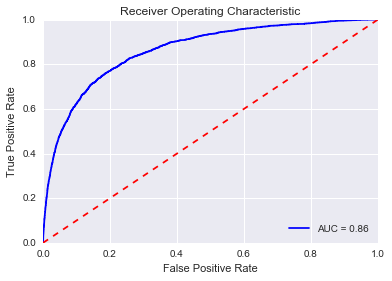

In [14]:
preds = pred
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

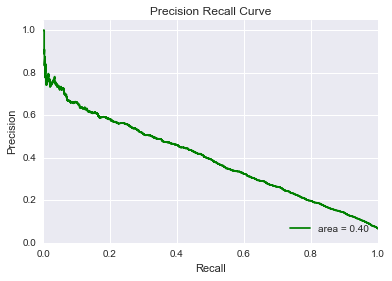

interpretation remaining


In [15]:
precision, recall, _ = precision_recall_curve(Y_validation, preds, pos_label=1)
average_precision = average_precision_score(Y_validation, preds)
plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

print "interpretation remaining"

In [18]:
# lets use best model to learn whole model
X_train_final=np.array(df_train[features])
Y_train_final=np.array(df_train.SeriousDlqin2yrs)

train_all=xgb.DMatrix(X_train_final,Y_train_final)
clf_best=xgb.train(param,train_all,num_boost_round=420,maximize=False)

In [19]:
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_test=np.array(df_test[features])
test_all=xgb.DMatrix(X_test)
pred_test=clf_best.predict(test_all)

In [26]:
del df_test['Unnamed: 0']
df_test[features].head()
df_test['prob']=pred_test

In [20]:
idx=np.arange(1,len(pred_test)+1,1)
print len(pred_test)

#output=np.array()
#output=np.zeros((len(pred_test),2))
#output[:,0]=idx
#output[:,1]=pred_test
output=pd.DataFrame(pred_test)
dfoutput=pd.DataFrame(output)
dfoutput['Id']=idx
dfoutput['Probability']=dfoutput[0]
del dfoutput[0]
dfoutput

101503


,Id,Probability
0,1,0.070073
1,2,0.055193
2,3,0.031300
3,4,0.083172
4,5,0.095478
5,6,0.041920
6,7,0.050859
7,8,0.044973
8,9,0.013672
9,10,0.463702


In [ ]:
df_test
df_test.to_csv('pred_xgb_record.csv',index=False)

In [ ]:
df_train=pd.read_csv('train_ireg_amd_dmd.csv')

In [63]:
dfoutput.to_csv('pred_xgb.csv',index=False)

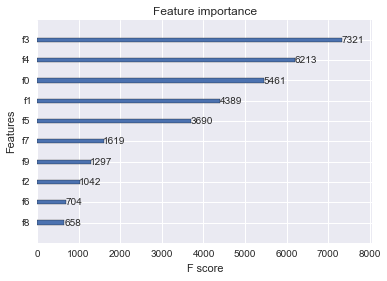

In [64]:
xgb.plot_importance(clf_best)

RuntimeError: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' path

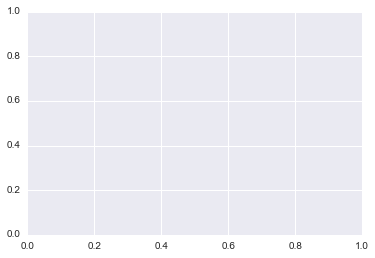

In [66]:
xgb.plot_tree(clf_best, num_trees=2)